#Nick Staich

Project 1 - Final (Core)
This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  
3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.
4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
Do not include data cleaning, pre-processing, or exploration steps in your presentation.
Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 
Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.
Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

filename = r'Data\sales_predictions.csv'

df = pd.read_csv(filename)
df.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_15148\1971790721.py:10: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min':df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_15148\1971790721.py:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null %,nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [3]:
#Plotting Customization Options
plt.style.use(('classic','dark_background'))
sns.set_context(context='notebook', font_scale=1.2)
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['figure.facecolor']='black'

Text(0.5, 1.0, 'Distribution of Item Outlet Sales')

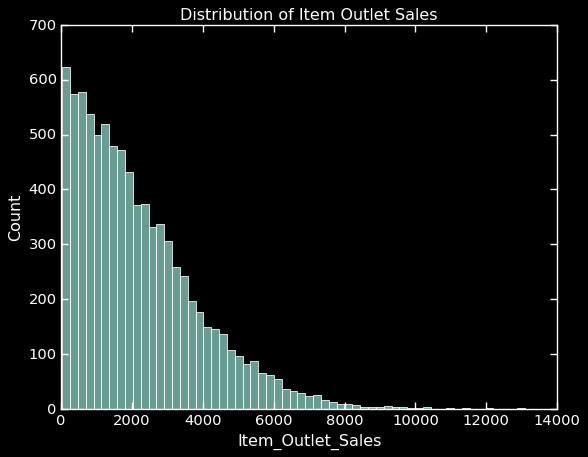

In [4]:
ax = sns.histplot(data=df, x='Item_Outlet_Sales');
ax.set_title("Distribution of Item Outlet Sales")

In [5]:
import sklearn
print (f"sklearn version: {sklearn.__version__}")
!python --version

sklearn version: 1.1.3
Python 3.9.15


In [6]:
#Our Standard imports
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
#Models and evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
#Set random state for reproducibility
SEED = 321 
np.random.seed(SEED)
#set pandas to display more columns
pd.set_option('display.max_columns',50)

In [8]:

#X_test_freqs = X_test['Item_Identifier'].value_counts(normalize=True)

#X_test_freqs

#X_test_items = X['Item_Identifier']

In [23]:
# Make x and y variables
y = df['Item_Outlet_Sales'].copy()
X = df.drop(columns=['Item_Outlet_Sales']).copy()

#stratify=X_test_items, 
# Train-Test-Split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8269           FDI60        7.220          Regular         0.064142   
7604           DRD25        6.135               LF         0.079294   
2762           NCP18       12.150          Low Fat         0.028593   
6464           NCS30        5.945               LF         0.093009   
4707           FDI08       18.200          Regular         0.066285   
...              ...          ...              ...              ...   
3482           FDL44          NaN          Low Fat         0.012216   
8360           FDA34       11.500          Low Fat         0.014884   
5929           NCU30        5.110          Low Fat         0.034945   
4220           FDX47        6.550          Regular         0.034800   
6682           DRG49        7.810          Low Fat         0.067730   

                  Item_Type  Item_MRP Outlet_Identifier  \
8269           Baking Goods   61.2510            OUT010   

In [22]:
# Make categorical se;lector and verify it works

cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:

X_test_freqs = X_test['Item_Identifier'].value_counts(normalize=True)

X_test_freqs

X_test_items = X['Item_Identifier']

<AxesSubplot: xlabel='Item_Identifier', ylabel='Count'>

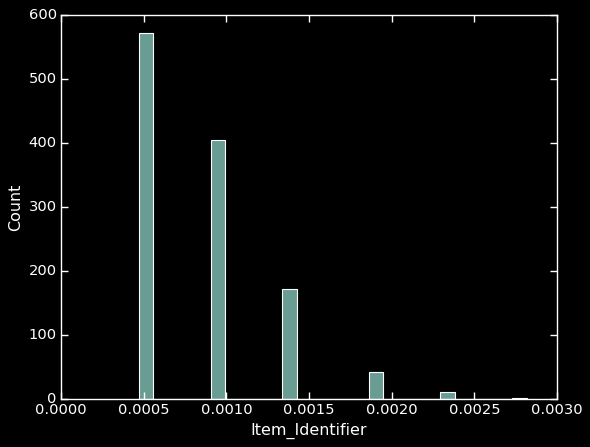

In [13]:
sns.histplot(X_test_freqs)

In [14]:
#Make numeric selector and verify it works

num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [15]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='MISSING'),
                         OneHotEncoder(drop='first', min_frequency=.0010, sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [16]:

preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                      verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3E9D7640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                min_frequency=0.001,
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3EA80AC0>)],
                  verbose_feature_names_out=False)

In [17]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRE49',
       'Item_Identifier_DRF01', 'Item_Identifier_DRF03',
       'Item_Identifier_DRI03', 'Item_Identifier_DRK35',
       'Item_Identifier_DRL60', 'Item_Identifier_DRM37',
       'Item_Identifier_DRN47', 'Item_Identifier_FDB56',
       'Item_Identifier_FDB58', 'Item_Identifier_FDD29',
       'Item_Identifier_FDD50', 'Item_Identifier_FDE11',
       'Item_Identifier_FDE33', 'Item_Identifier_FDF05',
       'Item_Identifier_FDF16', 'Item_Identifier_FDF21',
       'Item_Identifier_FDF56', 'Item_Identifier_FDG09',
       'Item_Identifier_FDG24', 'Item_Identifier_FDG33',
       'Item_Identifier_FDG38', 'Item_Identifier_FDH27',
       'Item_Identifier_FDI41', 'Item_Identifier_FDI45',
       'Item_Identifier_FDJ48', 'Item_Identifier_FDJ55',
       'Item_Identifier_FDK08', 'Item_Identifier_FDK20',
       'Item_Identifier_FDL34', 'Item_Identifier_FDL48',
       'Item_Identifier_FDN12',

In [18]:
#Create a preprocessed Dataframe for our training set using the pulled out feature names and original X_train

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRE49,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRI03,Item_Identifier_DRK35,Item_Identifier_DRL60,Item_Identifier_DRM37,Item_Identifier_DRN47,Item_Identifier_FDB56,Item_Identifier_FDB58,Item_Identifier_FDD29,Item_Identifier_FDD50,Item_Identifier_FDE11,Item_Identifier_FDE33,Item_Identifier_FDF05,Item_Identifier_FDF16,Item_Identifier_FDF21,Item_Identifier_FDF56,Item_Identifier_FDG09,Item_Identifier_FDG24,Item_Identifier_FDG33,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4707,18.200,0.066285,247.2092,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [20]:
# Create the pre-processed DataFrame for the test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                        columns = feature_names, index = X_test.index)
X_test_df.head()

ValueError: Found unknown categories ['NCW05', 'DRO35', 'NCR42', 'DRF48', 'FDW14'] in column 0 during transform

In [ ]:
# Confirm the head of y_test still matches up with X_test_df

y_test.head()

In [ ]:
# Create a custom function for regression evaluation

def evaluate_regression(model, X_train, y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    # Training data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                           squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
    
    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                          squared=False)
    
    print(f"Test Data: \tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [ ]:
# Run a regression model and check that the evaluation function runs correctly

lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

In [ ]:
lin_feats = lin_reg.feature_names_in_
lin_feats

In [ ]:
lin_reg.coef_

In [ ]:
print(len(lin_reg.coef_))
print(len(lin_reg.feature_names_in_))
len(lin_reg.coef_) == len(lin_feats)

In [ ]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= lin_feats)
coeffs['intercept'] = lin_reg.intercept_
coeffs

In [ ]:
def get_importances(model, feature_names=None, name='Feature Importance',
                   sort=False, ascending=True):
    # Checking for Feature Names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    # Saving the Feature Importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # Sort the importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [ ]:
# Test the function:

importances = get_importances(lin_reg, sort=True, ascending=False)
importances

In [ ]:
pd.DataFrame(zip(X.columns, model.coef_))

lin_reg.feature_importances_

In [ ]:
# Checking the number of feature importances matches the number of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

## Determine Approach to cleansing Item_Weight

In [ ]:
#Determine Approach to cleansing 'Item_Weight'
#Get the rows where 'Item_Weight' is NaN
#item_weight_miss = df['Item_Weight'].isna()
#df.loc[item_weight_miss, :]

# *** - I commented out this part later as I determined I could use SimpleImputer to fix the dataset, and use it in the ML model later.  I'm leaving the code for posterity when I read back through this.
#Item_Weight_Mean = df['Item_Weight'].mean()  #Based on Will's feedback, I changed my approach and am calculating the mean of Item Weights into a variable that I can pass into the replace method.
#Item_Weight_Mean

#df['Item_Weight'].fillna(12.858, inplace=True)
#df['Item_Weight']

#df['Item_Weight'].value_counts()
# ***
#Fixed the values with a mean value to preserve the data instead of tossing it.

df['Item_Weight'].describe

We need to look at the distribution of values for item weight to determine the best means of resolving the Item Weight missing values.  


In [ ]:

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Weight', ax=ax)
ax.set(title='Distribution of Item Weights');

## Annotating mean and median
mean_price = df['Item_Weight'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_Weight'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

The data seems normally distributed, and the mean and median values are in close proximity, but seem slightly wqeighted in count to the left, so we will use the Median value (12.60) instead of the Mean value (12.86).  

After we do our train test split, we will have to use simpleImputer to replace the values with the median value.

##Determine Approach to cleansing Outlet_Size

In [ ]:
#Determine Approach to cleansing Outlet_Size
check1 = df['Outlet_Identifier']=='OUT010'
df.loc[check1,:]
check1.value_counts()

OK, so this 1 outlet 'Out010' is missing 555 'Outlet_Size' observations, roughly 20% of the missing values, but would contribute 5555 other observations to the data model.  That said, there are still 1600 missing entries in that column, which is categorical and seems only loosely corellated to sales volume, and I am not sure if the outlet size would be as impactful in later modeling.  I think the best bet would be to remove the 'Outlet_Size' column altogether.

In [ ]:
#Determine Approach to cleansing Outlet_Size
check1 = df['Outlet_Identifier']=='OUT019'
df.loc[check1,:]
check1.value_counts()

In [ ]:
# EDIT: At a later stage of this project I had learned about imputing categorical data with 'most frequent' which will be better than losing the rest of the data set.
#dropping the columns from the dataframe as we've discussed
#df = df.drop(columns=['Outlet_Size'])
#df.head()

In [ ]:
df['Outlet_Size'].value_counts()  


In [ ]:
df['Outlet_Size'].isna()

# 6) Confirm that there are no missing values after addressing them.

In [ ]:
df.info()

# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
df.keys()

There do not seem to be any inconsistencies in the nomenclature.  There are semantic discussions to be had around naming conventions and personal preferences ('Outlet_Establishment_Year' instead of 'Founded', I mean, really...?) but from an overall performance standpoint these category labels are both readable, consistent in convention, and informative with respect to their content.

Let's check within the columns themselves, to ensure the data is properly cleansed.

In [ ]:
df['Item_Identifier'].value_counts()

In [ ]:
IFC = df.value_counts(['Item_Fat_Content'])
IFC

Yeah, this is a major problem.  There are a lot of misaligned references, where LF, low fat, and Low Fat are obviously the same thing, as is reg and Regular.  Let's convert everything aroung the major categories of Low Fat and Regular.

In [ ]:
#df['Item_Fat_Content'] = np.where(df['Item_Fat_Content'] == 'LF', 'Low Fat', df['Item_Fat_Content'])
#IFC

df['Item_Weight'].isna().value_counts(normalize=True)


# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
#Let's review our columns, counts, and dtypes...
df.info()

In [ ]:
#Now we'll take the 4 columns with numerical values and run descriptive summary statistics on them.
df[['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

Alright.  Not bad.  We are ready to start some analysis.

#Week 3 -  Project 1 - Part 3 (Core)


We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. 

This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!



Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [ ]:
df.corr()

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens')

#So a very interesting finding from the correlations matrix.  There is a relatively strong correlation between Item_MRP and Item_Outlet_Sales, telling me that we are seeing 
#very real price elasticity in what people are willing to purchase.  One thing that is contrarian to most incoming assumptions with the data set is that there is very
#little strength in the correlation between Item Outlet Sales and Item Visibility.  Given the wide The data, at this time, is telling us it is not so important that people see your product, 
# only that it must fall into the right price point if they do.  

In [ ]:
# So let's plot the ditribution of Item MRPs. 



## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_MRP', stat='count');
ax.set(title='Distribution of Manufacturers Retail Price');

## Annotating mean and median
mean_price = df['Item_MRP'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_MRP'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

 # If my hypothesis is tracking, the mean should be 
 #somewhat left of center, as the price elasticity will
 # drive consumers to higher volumes of lower cost goods
 #to extend their purchasing power...it seems as though it is.

In [ ]:
#I am curious about the visibility statistics...



## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Visibility', stat='count');
ax.set(title='Distribution of Product Visibility');

## Annotating mean and median
mean_price = df['Item_Visibility'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Visibility = {round(mean_price,2)}");

med_price = df['Item_Visibility'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Visibility = {round(med_price,2)}");

ax.legend();


# Well that's interesting...the distribution is an F-Distribution and not a normalized 
# distribution.  this explains the weak correlation value, but I am curious about the
# percentage of sales generated fromItem Visibility scores above 0.20.

In [ ]:
#sales_to_visibility_filter = df.groupby(['MRP'])['Item_Outlet_Sales']>=0.20
outlets = df.groupby('Outlet_Identifier')


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Outlet_Sales')
ax.set(title='Distribution of Stores by Sales Volume');

## Annotating mean and median
mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Stores Sales Volume = ${round(mean_price,2)}");

med_price = df['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Store Sales Volume = ${round(med_price,2)}");

ax.legend();

In [ ]:
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales',);
plt.xticks(rotation=45);

This chart actually gives us some very important information!  Earlier we identified a significant amount of missing data values for the 'Outlet Size' feature.  It is very hard to read in this format, so I will use an im,proved version below for explanation.

In [ ]:
sns.histplot(data=df, x='Outlet_Identifier',);
plt.xticks(rotation=45);

In [ ]:
sns.histplot(data=df, x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(rotation=45);

This chart has the better visulaiztion for the boxplot above.  As you can clearly see, OUT010 and OUT019 both have dramatically lower overall sales volume and a clear concetration of outlets with not only low sales volume but low part counts (the dark blue shading at the bottom).  This is indicative of a small outlet, that through their small product portfolio can only generate a limited number of sales.  This information will allow us to better cleanse our data of over 1000 of the 

#Week 5 - Machine Learning Preprocessing

FIrst, I'll need to look at the info and check on the state of things.

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df.info()

In [ ]:
df.drop(columns = ['Item_Identifier','Item_Weight','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], inplace=True)

df.info()

[Edit: I'm going to hold off on the below, but I'll leave it here in case I see that I need it later.]

Alright, I'll have to adjust the Ordinal values in the Outlet Size column.  I believe this to be an ordinal column because there is nop numeric value in the dataset, such as square footage, that would be able to give a weight in the model relative to size

In [ ]:
#df['Outlet_Size'].value_counts()

Let's split our data set,  Then we cqan begin our pipelines and transformations.

In [ ]:
# Instantiate Train Test Split
# The assignment callouts for Target and Features assignment 
# is in direct contrast to industry protocols, and as usch I will not be adhering
# to that request.  My targets will be in y and my Features in X.

# Instantiate and select the target
y = df['Item_Outlet_Sales']

# Instatiate and select the features
X = df.drop(columns='Item_Outlet_Sales')

# Set TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train

Split looks successful.  It's time to Instantiate the column selectors.

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

# Scaler
scaler = StandardScaler()

# One Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric Pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

In [ ]:
# Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

In [ ]:
# fit on train
preprocessor.fit(X_train)

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

Yeah, this looks pretty good so far.  By god that dataset is massive.  Good thing the machine will be doing the learning with that many columns (I know it's mostly due to the One Hot Encoding)!

# Regression

In [ ]:
#Build a linear regression model. Evaluate the performance of your model based on r^2. Evaluate the performance of your model based on rmse.

In [ ]:
#Make an instance of the Linear Regression Model
reg = LinearRegression()

In [ ]:
#   train our linear regression model on the training data.
reg.fit(X_train_processed,y_train)

In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

In [ ]:
#  check the R^2 score for the training set:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score) 

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

A 36% match.  

# Regression Tree Model
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [ ]:
#Build an instance of your model
bagreg = BaggingRegressor(n_estimators = 100, random_state = 42)

# Look at the hyperparameters
bagreg.get_params()

In [ ]:
bagreg.fit(X_train_processed, y_train)

In [ ]:
bagreg.fit(X_train_processed, y_train)

In [ ]:
bagreg.predict(X_test_processed)

In [ ]:
# Stgep 5: Evaluate the model performance:

bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

#  check the R^2 score for the training set:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score) 

bagreg_r2_train = r2_score(y_train, train_preds)
bagreg_r2_test = r2_score(y_test, test_preds)
print(bagreg_r2_train)
print(bagreg_r2_test)

bagreg_mae_train = mean_absolute_error(y_train, train_preds)
bagreg_mae_test = mean_absolute_error(y_test, test_preds)
print(bagreg_mae_train)
print(bagreg_mae_test)

bagreg_mse_train = mean_squared_error(y_train, train_preds)
bagreg_mse_test = mean_squared_error(y_test, test_preds)
print(bagreg_mse_train)
print(bagreg_mse_test)

bagreg_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
bagreg_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

Run 1:

0.9278218979158627

0.5373746660067594

Needs serious tuning.

Run 2 (Parameter Adjust: n_estimaors = 50)

0.9354451124061893

0.5465621330506721

Run 2 (Parameter Adjust: n_estimaors = 100)

0.9377775831517625

0.5502263582728071

#  Random Forest

In [ ]:
#Inatantiate your model
rf = RandomForestRegressor(max_depth = 150, n_estimators = 100, random_state = 42)

In [ ]:
# Check for tunable parameters

rf.get_params()

In [ ]:
# Fit your model

rf.fit(X_train_processed, y_train)

In [ ]:
rf.predict(X_test_processed)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

# Evaluate the model performance:

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

rf_r2_train = r2_score(y_train, train_preds)
rf_r2_test = r2_score(y_test, test_preds)
print(rf_r2_train)
print(rf_r2_test)

rf_mae_train = mean_absolute_error(y_train, train_preds)
rf_mae_test = mean_absolute_error(y_test, test_preds)
print(rf_mae_train)
print(rf_mae_test)

rf_mse_train = mean_squared_error(y_train, train_preds)
rf_mse_test = mean_squared_error(y_test, test_preds)
print(rf_mse_train)
print(rf_mse_test)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

Executive summary:

Looked into all available data features for those impactful via a high correlation, and reoved the others.
